<a href="https://colab.research.google.com/github/Miku0204/Michigan-Computer-Vision/blob/main/KNN%20Classifier/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set-up code

In [3]:
user_email = "your git global email"
user_name  = "your git global user"

!git config --global user.email {user_email}
!git config --global user.name {user_name}

In [ ]:
repository = "Michigan-Computer-Vision"
git_token = "your github token"

!git clone https://{git_token}@github.com/{user_name}/{repository}

In [ ]:
import os 
repository_path = os.path.join("." , repository)
knn_name        = "KNN Classifier"
knn_path        = os.path.join(repository_path , knn_name)
utils_path      = os.path.join(knn_path        , "utils" )
print(os.listdir(knn_path))
print(os.listdir(utils_path))

In [7]:
import sys
sys.path.append(knn_path)

In [8]:
import utils
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data visualization

In [9]:
num_train  = 400
num_test   = 200
train_image , train_label , test_image , test_label  = utils.data.data_loading(num_train , num_test)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteMCPL07/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteMCPL07/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [11]:
class_dict = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Help on function random_samples in module utils.vis:

random_samples(X, y, class_dict, samples_per_row)
    Randomly select samples_per_row for each class on the whole available dataset
    then visualize it
    
    Inputs : 
    
    X : a tensor of [N x H x W x C] shape where N is size of batch
    y : the paired label for X
    class_dict : the name of classes
    samples_per_row : the number of sample images we want to show for each class
    
    Returns : 
    sample_fig : a subplots of shape samples x samples that have the class name
    on the left



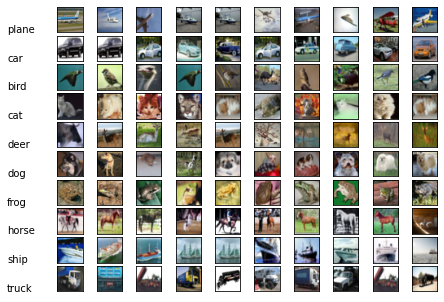

In [12]:
help(utils.vis.random_samples)

utils.vis.random_samples(train_image , train_label , class_dict , 10)

# KNN Classifier

In [13]:
from knn import KnnClassifier
import time 

##Compute-distance Naive loop

In [14]:
from knn import compute_distance_two_loops

In [15]:

num_train  = 50
num_test   = 20
train_image , train_label , test_image , test_label = utils.data.data_loading(num_train , num_test)

In [16]:
help(compute_distance_two_loops)

Dist_two_loops = compute_distance_two_loops(train_image , test_image)

print("Shape of distance : "  , Dist_two_loops.shape)
print("Dtype of distance :"   , Dist_two_loops.dtype)

Help on function compute_distance_two_loops in module knn:

compute_distance_two_loops(x_train, x_test)
    Helps on compute_distance_two_loops : 
    This function just implicitly loop through the training set and test set 
    to compute SQUARED EUCLID distance between each training examples and tes
    examples . Images should be flattened out and treated as vector
    
    Inputs : 
    x_train : [num_train x H x W x C] tensor , contain information of num_train 
    training examples . dtype = 'int8'
    x_test  : [num_test x H x W x C] tensor , contain information of num_test test 
    examples , dtype = 'int8'
    
    Returns : 
    dist    : [num_train x num_test] numpy array, where the entry dist[i][j] stores 
    distance of train[i] and test[j]

Shape of distance :  (50, 20)
Dtype of distance : float32


## Compute Distance Vectorization

### One loop vectorization

In [17]:
from knn import compute_distance_one_loop

In [18]:
num_train = 50 
num_test  = 20


train_image  = tf.convert_to_tensor(np.random.rand(num_train , 4 , 4)) 
train_label  = tf.convert_to_tensor(np.random.randint(0 , 9 , num_train))

test_image   = tf.convert_to_tensor(np.random.rand(num_test , 4 , 4))
test_label   = tf.convert_to_tensor(np.random.randint(0 , 9 , num_test))


In [26]:
help(compute_distance_one_loop)

Dist_two_loops = compute_distance_two_loops(train_image , test_image)
Dist_one_loop  = compute_distance_one_loop(train_image , test_image)

print("Distance matrix has shape:" , Dist_one_loop.shape )

Difference  = Dist_one_loop - Dist_two_loops 

print(Difference.min() , np.max(Difference))


Help on function compute_distance_one_loop in module knn:

compute_distance_one_loop(x_train, x_test)
    Helps on compute_distance_one_loop : 
    This is the vectorized version of compute_distance_two loops , this one 
    will only loop through x_train and subtract it from the vector of test set
    and return the result on dist
    
    Inputs : 
    x_train : [num_train x H x W x C] tensor , dtype = 'uint8'
    x_test  : [num_test x H x W x C] tensor , contain information of num_test, 
    dtype = 'int8'
    
    
    Returns : 
    dist    : [num_train x num_test] tensor , where the entry dist[i][j] stores 
    distance of train[i] and test[j]

Distance matrix has shape: (50, 20)
0.0 0.0


### No loop computing

In [21]:
from knn import compute_distance_no_loop

In [20]:
num_train = 50
num_test  = 20
train_image , train_label , test_image , test_label = utils.data.data_loading(num_train , num_test)

In [25]:
help(compute_distance_no_loop)
Dist_two_loops = compute_distance_two_loops(train_image , test_image)
Dist_no_loop   = compute_distance_no_loop(train_image , test_image)
Difference     = Dist_two_loops - Dist_no_loop

print("Dist_no_loop shape : " ,  Dist_no_loop.shape)
print("Max error          : " ,  np.max(Difference))



Help on function compute_distance_no_loop in module knn:

compute_distance_no_loop(x_train, x_test)
    This function computes distance between x_train and x_test by vectorization.
    Both input will be multiplied with a intermediate matrix to press them down.
    
    
    Inputs :
    x_train : [num_train x H x W x C] tensor , dtype = 'uint8' 
    x_test  : [num_test x H x W x C] tensor , dtype = 'uint8'
    
    Returns : 
    dist    : [num_train x num_test] tensor , dtype = 'uint8'
    with dist[i][j] is the squared euclidian distance of train[i] and test[j]

Dist_no_loop shape :  (50, 20)
Max error          :  7.6293945e-06


#Predicting Labels


In [27]:
from knn import predict_label

In [28]:
help(predict_label)

Help on function predict_label in module knn:

predict_label(distance, y_train, k=1)
    This function take the distance computed between x_train and x_test
    and take k neaest sample from x_train's label : y_train to assign to x_test
    
    Inputs : 
    Distance : [num_train x num_test] tensor
    y_train  : Paired label of x_train
    
    Returns  : 
    y_pred   : Predicted label for each sample/image on x_test



In [36]:
"""
You should see a result at arround 23 - 27 % with k = 1 as default

"""

dists = compute_distance_no_loop(train_image , test_image)
sum(predict_label(dists , train_label) == test_label.numpy()) / num_test * 100

25.0

## A complete Knn model

In [37]:
from knn import KnnClassifier

In [38]:
classifier = KnnClassifier(train_image , train_label)

In [ ]:
k_value = 3
print("Prediction on test set" , classifier.predict(test_image , test_label , k_value) )
